In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("VCB_Stock_Data.csv")
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [3]:
# Split the data into training and testing sets
train_size = int(0.9 * len(df))
test_size = len(df) - train_size 
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [4]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])
# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [5]:
# 4. Quá trình testing \n",
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

In [6]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo\n",
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)
# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[79731.03032721 79760.29072969 79789.55113216 79818.81153464
 79848.07193712 79877.3323396  79906.59274207 79935.85314455
 79965.11354703 79994.37394951 80023.63435199 80052.89475446
 80082.15515694 80111.41555942 80140.6759619  80169.93636437
 80199.19676685 80228.45716933 80257.71757181 80286.97797428
 80316.23837676 80345.49877924 80374.75918172 80404.01958419
 80433.27998667 80462.54038915 80491.80079163 80521.0611941
 80550.32159658 80579.58199906]


In [7]:
# 6. Đánh giá độ chính xác test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 7489.0057036959815


In [8]:
# 7. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 7489.0057036959815


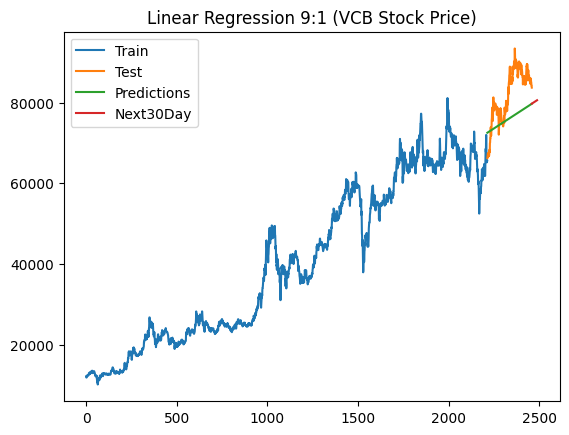

In [9]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.title('Linear Regression 9:1 (VCB Stock Price)')
plt.show()